# Miniproyecto 1

## 1. Lectura y análisis exploratorio de datos

a, b. Carga de librerías necesarias para el miniproyecto

In [51]:
#b. Carga de librerias necesarias
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
import random

In [3]:
#Funciones a utilizar en el miniproyecto
def convertir_monto(val):
    nuevo_data = val.replace(',','').replace('$', '')
    return float(nuevo_data)

def convertir_percentaje(val):
    nuevo_data = val.replace('%', '')
    return float(nuevo_data) / 100

c. Carga de datos en csv y exploración de la base

In [4]:
#c.Carga de datos

# Utilizar la función read_csv para cargar el archivo
df1 = pd.read_csv("ejemplo_data.csv", parse_dates = True)

df1


,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,No,2-15-2014,n


D. Tipos de variables

In [5]:
#d. Tipos de variables
df1.dtypes

ID              int64
Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo         object
dtype: object

In [6]:
#Dimensiones del dataframe
print(df1.shape)

(6, 8)


Transformación de variables

In [7]:
#e. Transformacion ID a entero y Activo a binario
df1['ID'].astype('int')
df1["Activo"] = pd.to_numeric(df1['Activo'], errors='coerce').fillna(0).astype('bool')

df1.dtypes

ID              int64
Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo           bool
dtype: object

In [8]:
#f. Convertir Unidades a entero y 2016 a flotante

#Variable Unidades
df1["Unidades"] = pd.to_numeric(df1['Unidades'], errors='coerce').fillna(0).astype('int')

#Variable 2016
df1['2016'] = df1['2016'].apply(convertir_monto)

df1.dtypes

ID               int64
Nombre          object
2016           float64
2017            object
Crecimiento     object
Unidades         int32
fecha           object
Activo            bool
dtype: object

## 2. Estadísticas descriptivas

In [9]:
#a. Creación de diccionario con 20 datos 
id_usuario=[]
nombre=[]
nota=[]
edad=[]
pesos=[]

for i in range(1,21):
    id_usuario.append(i)
    nombre.append("Nombre persona"+str(i))
    nota.append(random.randint(0,100))
    edad.append(random.randint(18, 50))
    pesos.append(1/20)

datos = {
    'ID':id_usuario,
    'Nombre': nombre,
    'Nota': nota,
    'Edad': edad,
    'Pesos': pesos
}



#b.Transformación a Dataframe con pandas
df2 = pd.DataFrame(datos)

#Transformacion de Nombre a variable categórica
df2['Nombre']= df2['Nombre'].astype('category')

df2




,ID,Nombre,Nota,Edad,Pesos
0,1,Nombre persona1,92,29,0.05
1,2,Nombre persona2,79,50,0.05
2,3,Nombre persona3,81,35,0.05
3,4,Nombre persona4,39,35,0.05
4,5,Nombre persona5,71,43,0.05
5,6,Nombre persona6,5,29,0.05
6,7,Nombre persona7,23,41,0.05
7,8,Nombre persona8,77,39,0.05
8,9,Nombre persona9,88,39,0.05
9,10,Nombre persona10,50,48,0.05


Análisis descriptivo

In [10]:
#c. Estadísticas descriptivas de tendencia central

#Variable Notas
#i Media
promedio_simple = df2['Nota'].mean()
#ii Media aritmética con pesos
promedio_ponderado = np.average(df2['Nota'],weights=df2['Pesos'])
#iii Media truncada
df_trunc = df2.drop(df2.index[[6,4]])
promedio_truncado = df_trunc['Nota'].mean()
#iv Moda
moda = df2.Nota.mode()
#v Mediana
mediana = df2.Edad.median()

#Variable Edad
#i Media
promedio_simple_edad = df2['Edad'].mean()
#ii Media aritmética con pesos
promedio_ponderado_edad = np.average(df2['Edad'],weights=df2['Pesos'])
#iii Media truncada
df_trunc2 = df2.drop(df2.index[[6,4]])
promedio_truncado_edad = df_trunc2['Edad'].mean()
#iv Moda
moda_edad = df2.Nota.mode()
#v Mediana
mediana_edad = df2.Edad.median()

print('Estadisticas descriptivas de tendencia central para variable Notas','\n','\nNotas promedio:', promedio_simple,'\nNotas promedio ponderado:', promedio_ponderado,'\nNotas Media truncada:',
     promedio_truncado,'\nNotas Moda:',moda,'\nNotas Mediana:',mediana,'\n ')

print('Estadisticas descriptivas de tendencia central para variable Edad','\n','\nEdad promedio:', promedio_simple_edad,'\nEdad promedio ponderado:', promedio_ponderado_edad,'\nEdad Media truncada:',
     promedio_truncado_edad,'\nEdad Moda:',moda_edad,'\nEdad Mediana:',mediana_edad)



Estadisticas descriptivas de tendencia central para variable Notas 
 
Notas promedio: 50.85 
Notas promedio ponderado: 50.84999999999999 
Notas Media truncada: 51.27777777777778 
Notas Moda: 0    79
dtype: int64 
Notas Mediana: 38.0 
 
Estadisticas descriptivas de tendencia central para variable Edad 
 
Edad promedio: 36.4 
Edad promedio ponderado: 36.39999999999999 
Edad Media truncada: 35.77777777777778 
Edad Moda: 0    79
dtype: int64 
Edad Mediana: 38.0


In [11]:
#d.1 Estadísticas descriptivas de dispersión.

#Variable Notas
#i Rango
rango_nota = np.round(df2.Nota.max()-df2.Nota.min(),2)
#ii Varianza
varianza_nota = np.round(df2.Nota.var(),2)
#iii Desviación estándar
desviacion_nota = np.round(df2.Nota.std(),2)

#Variable Edad
#i Rango
rango_edad = np.round(df2.Edad.max()-df2.Edad.min(),2)
#ii Varianza
varianza_edad = np.round(df2.Edad.var(),2)
#iii Desviación estándar
desviacion_edad = np.round(df2.Edad.std(),2)

print('Estadisticas descriptivas de dispersión para variable Notas','\n','\nNotas Rango:', rango_nota,
      '\nNotas Varianza:', varianza_nota,'\nNotas Desviación estándar:',
     desviacion_nota,'\n ')

print('Estadisticas descriptivas de dispersión para variable Edad','\n','\nEdad Rango:', rango_edad,
      '\nEdad Varianza:', varianza_edad,'\nEdad Desviación estándar:',desviacion_edad)


Estadisticas descriptivas de dispersión para variable Notas 
 
Notas Rango: 87 
Notas Varianza: 967.82 
Notas Desviación estándar: 31.11 
 
Estadisticas descriptivas de dispersión para variable Edad 
 
Edad Rango: 32 
Edad Varianza: 79.2 
Edad Desviación estándar: 8.9


Estadísticas descriptivas de dispersión: Cuantiles y Matriz de Covarianza

In [13]:
#d.2 Estadísticas descriptivas de dispersión.
print('Cuantiles')
df2[['Edad','Nota']].quantile([0.25,0.5,0.75])


Cuantiles


,Edad,Nota
0.25,29.0,20.5
0.50,38.0,52.0
0.75,41.5,79.0


In [14]:
print('Matriz de covarianza')
df2.cov()

Matriz de covarianza


,ID,Nota,Edad,Pesos
ID,35.000000,-7.886842e+01,-3.789474e+00,0.000000e+00
Nota,-78.868421,9.678184e+02,2.401053e+01,1.037975e-32
Edad,-3.789474,2.401053e+01,7.920000e+01,-1.037975e-32
Pesos,0.000000,1.037975e-32,-1.037975e-32,5.068237e-35


## 3. Transformación e imputación de datos

In [58]:
#a. Importe librerías pandas y sklearn (realizado al principio del script)
#b. Cargar la base de datos de nombre ejemplo_data2.csv
df3 = pd.read_csv('ejemplo_data2.csv')
df3




,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


c. Para variables numéricas generar diagnóstico de números perdidos. Luego impute los valores de acuerdo a la media y de acuerdo a otro criterio seleccionado por usted. Explore las opciones de imputación del método fillna() de pandas.

In [52]:
#Verificando columnas numéricas 
#Definimos las opciones para los números enteros y flotantes y de esta forma identificar de manera más rápida aquellas columnas
#numéricas que contengan NaN
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df3.select_dtypes(include=numerics)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [59]:
for i in df3.select_dtypes(include=numerics): 
    print(i+': '+ str(df3.select_dtypes(include=numerics)[i].isnull().sum()))

Rooms: 0
Price: 0
Distance: 0
Postcode: 0
Bedroom2: 0
Bathroom: 0
Car: 62
Landsize: 0
BuildingArea: 6450
YearBuilt: 5375
Lattitude: 0
Longtitude: 0
Propertycount: 0


In [60]:
#Atributo Car completada utilizando criterio de media
df3.Car = df3.Car.fillna(value=df3.Car.mean())

#Atributo YearBuilt completado bajo el criterio de modadf3
df3.YearBuilt = df3.YearBuilt.fillna(df3.YearBuilt.mode()[0])

#Atributo BuildingArea completado bajo el criterio de back fill y forward fill para completar con los datos inmediatamente 
#anterior y posterior
df3.BuildingArea = df3.BuildingArea.fillna(method='ffill').fillna(method='bfill')

In [61]:
#Verificación de NaN en columnas numéricas
for i in df3.select_dtypes(include=numerics): 
    print(i+': '+ str(df3.select_dtypes(include=numerics)[i].isnull().sum()))

Rooms: 0
Price: 0
Distance: 0
Postcode: 0
Bedroom2: 0
Bathroom: 0
Car: 0
Landsize: 0
BuildingArea: 0
YearBuilt: 0
Lattitude: 0
Longtitude: 0
Propertycount: 0


In [62]:
df3.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

d. Transforme las variables categóricas a numéricas, generando una variable
dummy por cada categoría.

In [74]:
#Verificar dimensiones de variables categóricas
print('Address: ', df3['Address'].nunique(),
     '\nSuburb: ', df3['Suburb'].nunique(),
     '\nType: ', df3['Type'].nunique(),
     '\nMethod: ', df3['Method'].nunique(),
     '\nSellerG: ', df3['SellerG'].nunique(),
     '\nCouncilArea: ', df3['CouncilArea'].nunique(),
     '\nRegionname: ', df3['Regionname'].nunique())


Address:  13378 
Suburb:  314 
Type:  3 
Method:  5 
SellerG:  268 
CouncilArea:  33 
Regionname:  8


In [73]:
#Transformación a variable categórica
df3['Address']= df3['Address'].astype('category')
df3['Suburb']= df3['Suburb'].astype('category')
df3['Type']= df3['Type'].astype('category')
df3['Method']= df3['Method'].astype('category')
df3['SellerG']= df3['SellerG'].astype('category')
df3['CouncilArea']= df3['CouncilArea'].astype('category')
df3['Regionname']= df3['Regionname'].astype('category')

df3.dtypes

Suburb           category
Address          category
Rooms               int64
Type             category
Price             float64
Method           category
SellerG          category
Date               object
Distance          float64
Postcode          float64
Bedroom2          float64
Bathroom          float64
Car               float64
Landsize          float64
BuildingArea      float64
YearBuilt         float64
CouncilArea      category
Lattitude         float64
Longtitude        float64
Regionname       category
Propertycount     float64
dtype: object

No convertimos a variable dummy el atributo Adress puesto que tiene 33k valores únicos distintos, por lo que no sería óptimo ampliar la base de datos generando > 33k variables dummies.

In [80]:
#Transformamos variables categóricas a dummies
category_columns = ['Suburb','Type','Method','SellerG','CouncilArea','Regionname']
df3_dummys = pd.get_dummies(df3, prefix_sep='_', prefix=category_columns, columns=category_columns)



In [83]:
#Nuevas variables dummy creadas
set(df3.columns).symmetric_difference(df3_dummys.columns)

{'CouncilArea',
 'CouncilArea_Banyule',
 'CouncilArea_Bayside',
 'CouncilArea_Boroondara',
 'CouncilArea_Brimbank',
 'CouncilArea_Cardinia',
 'CouncilArea_Casey',
 'CouncilArea_Darebin',
 'CouncilArea_Frankston',
 'CouncilArea_Glen Eira',
 'CouncilArea_Greater Dandenong',
 'CouncilArea_Hobsons Bay',
 'CouncilArea_Hume',
 'CouncilArea_Kingston',
 'CouncilArea_Knox',
 'CouncilArea_Macedon Ranges',
 'CouncilArea_Manningham',
 'CouncilArea_Maribyrnong',
 'CouncilArea_Maroondah',
 'CouncilArea_Melbourne',
 'CouncilArea_Melton',
 'CouncilArea_Monash',
 'CouncilArea_Moonee Valley',
 'CouncilArea_Moorabool',
 'CouncilArea_Moreland',
 'CouncilArea_Nillumbik',
 'CouncilArea_Port Phillip',
 'CouncilArea_Stonnington',
 'CouncilArea_Unavailable',
 'CouncilArea_Whitehorse',
 'CouncilArea_Whittlesea',
 'CouncilArea_Wyndham',
 'CouncilArea_Yarra',
 'CouncilArea_Yarra Ranges',
 'Method',
 'Method_PI',
 'Method_S',
 'Method_SA',
 'Method_SP',
 'Method_VB',
 'Regionname',
 'Regionname_Eastern Metropolita

## 4. Visualización de datos

In [85]:
#b,c. Generación de base de datos distribuida como normal bivariada
#Base de calificación de juegos para consolas en el año 2019

#Parte 1
mean = [10, 10]
cov = [[1, 0], [0, 1]]  # diagonal covariance
bbdd1 = np.random.multivariate_normal(mean, cov, 5000)
bbdd1 = np.hstack([bbdd1, np.zeros((bbdd1.shape[0], 1))])

#Parte 2
mean = [8, 8]
cov = [[1,0],[0,1]]

bbdd2 = np.random.multivariate_normal(mean, cov, 5000)
bbdd2 = np.hstack([bbdd2, np.ones((bbdd2.shape[0], 1))])


In [86]:
#creamos el dataframe 1
df_1 = pd.DataFrame(bbdd1, columns=['Ventas','Calificacion','Consola'])
df_1

,Ventas,Calificacion,Consola
0,9.532470,9.568827,0.0
1,10.966999,11.306585,0.0
2,9.185080,11.517854,0.0
3,9.901415,9.282483,0.0
4,10.514195,11.484077,0.0
...,...,...,...
4995,9.349316,8.575928,0.0
4996,9.868622,10.983546,0.0
4997,8.500965,8.674839,0.0
4998,10.326808,10.570881,0.0


In [87]:
#creamos el dataframe 2
df_2 = pd.DataFrame(bbdd2, columns=['Ventas','Calificacion','Consola'])
df_2

,Ventas,Calificacion,Consola
0,6.567687,8.127156,1.0
1,5.622587,8.671869,1.0
2,7.280192,8.325874,1.0
3,5.797537,7.207769,1.0
4,6.970448,8.209071,1.0
...,...,...,...
4995,6.988145,9.237902,1.0
4996,8.226923,9.945972,1.0
4997,8.297962,7.773982,1.0
4998,8.328409,7.785124,1.0


In [88]:
#Combinación de dataframes
df_final = np.concatenate([df_1, df_2], axis = 0)
df_final = pd.DataFrame(df_final, columns = ['Ventas','Calificacion','Consola'])
df_final

,Ventas,Calificacion,Consola
0,9.532470,9.568827,0.0
1,10.966999,11.306585,0.0
2,9.185080,11.517854,0.0
3,9.901415,9.282483,0.0
4,10.514195,11.484077,0.0
...,...,...,...
9995,6.988145,9.237902,1.0
9996,8.226923,9.945972,1.0
9997,8.297962,7.773982,1.0
9998,8.328409,7.785124,1.0


Generamos un gráfico de dispersión junto a la distribución de la variable y combinamos utilizando una variable categórica que identifica el tipo de consola que es, para que podamos ver el efecto de contar con variables numéricas y categóricas

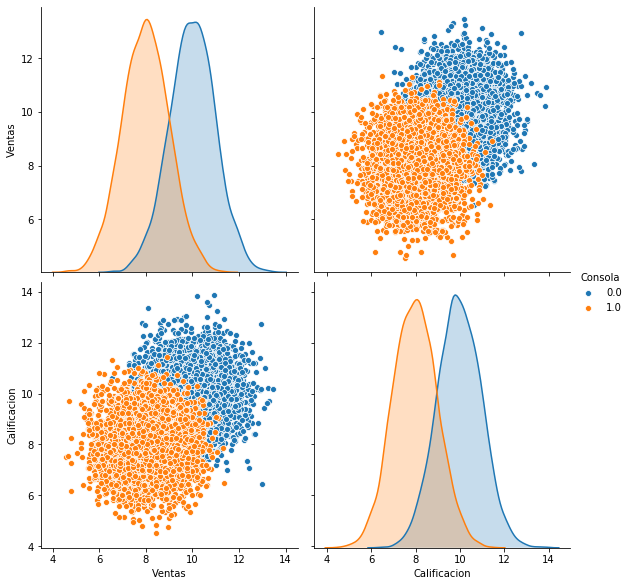

In [89]:
#e. Generación de gráfico de dispersión para las variables del dataframe
sns.pairplot(df_final, hue = "Consola", height=4);

In [105]:
#Creacion de variable categorica
lanzamiento = np.random.randint(low = 2005, high = 2019, size=df_final.shape[0])

In [106]:
df_final['Lanzamiento'] = lanzamiento
df_final

,Ventas,Calificacion,Consola,Lanzamiento
0,9.532470,9.568827,0.0,2011
1,10.966999,11.306585,0.0,2007
2,9.185080,11.517854,0.0,2017
3,9.901415,9.282483,0.0,2012
4,10.514195,11.484077,0.0,2009
...,...,...,...,...
9995,6.988145,9.237902,1.0,2017
9996,8.226923,9.945972,1.0,2017
9997,8.297962,7.773982,1.0,2017
9998,8.328409,7.785124,1.0,2008


A continuación generamos variable de años para poder visualizar cómo se vería el boxplot haciendolo correr por una variable categórica versus identificandolo como uno de una única variable.

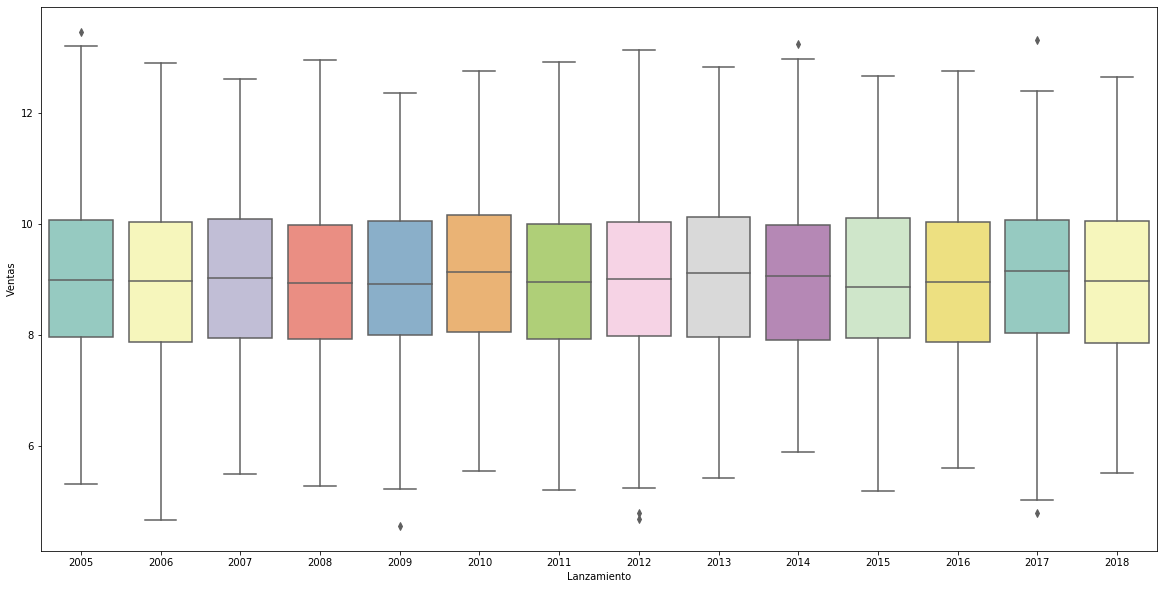

In [107]:
# f creación de boxplot utilizando la variable categórica del lanzamiento para poder generar un orden más interesante
plt.figure(figsize=(20,10))
sns.boxplot(x="Lanzamiento", y="Ventas", data=df_final, palette="Set3")

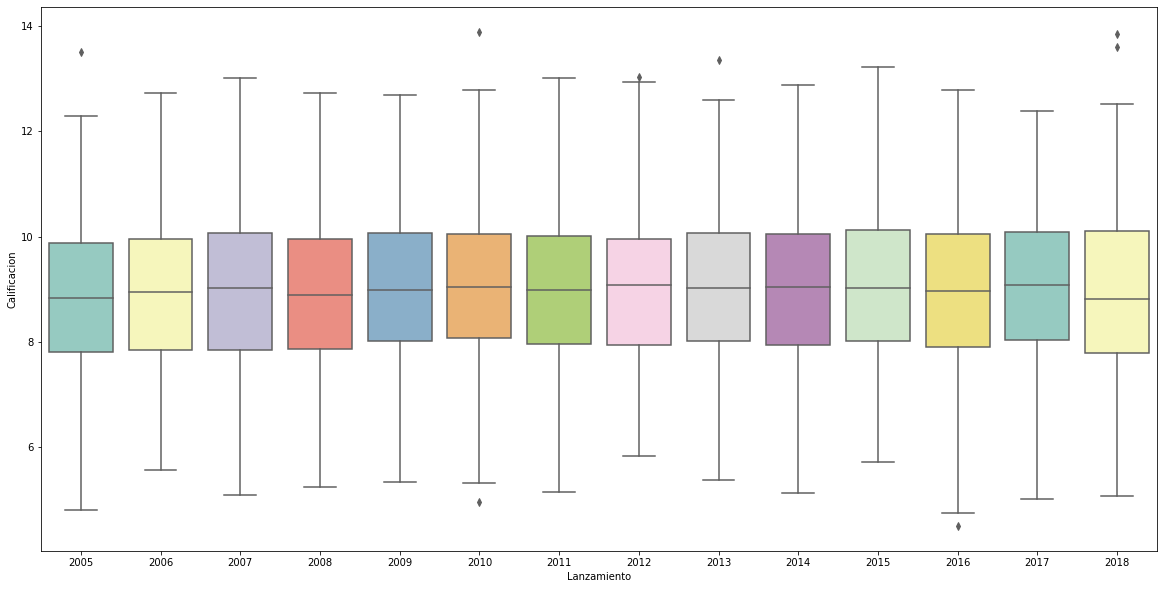

In [108]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Lanzamiento", y="Calificacion", data=df_final, palette="Set3")

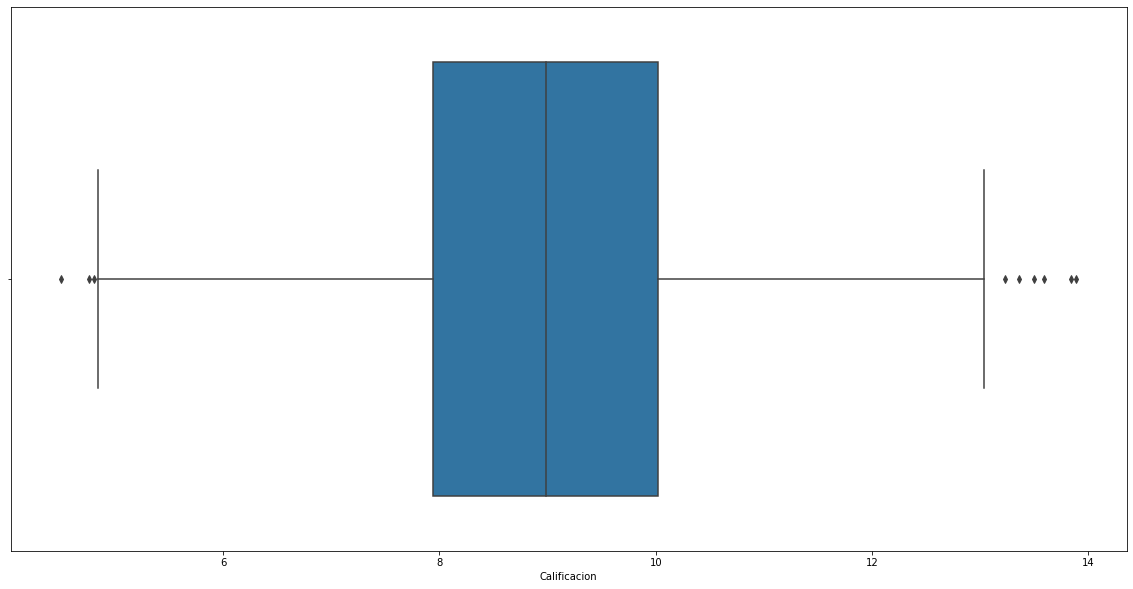

In [115]:
#Variables aisladas
plt.figure(figsize=(20,10))
sns.boxplot("Calificacion", data=df_final)

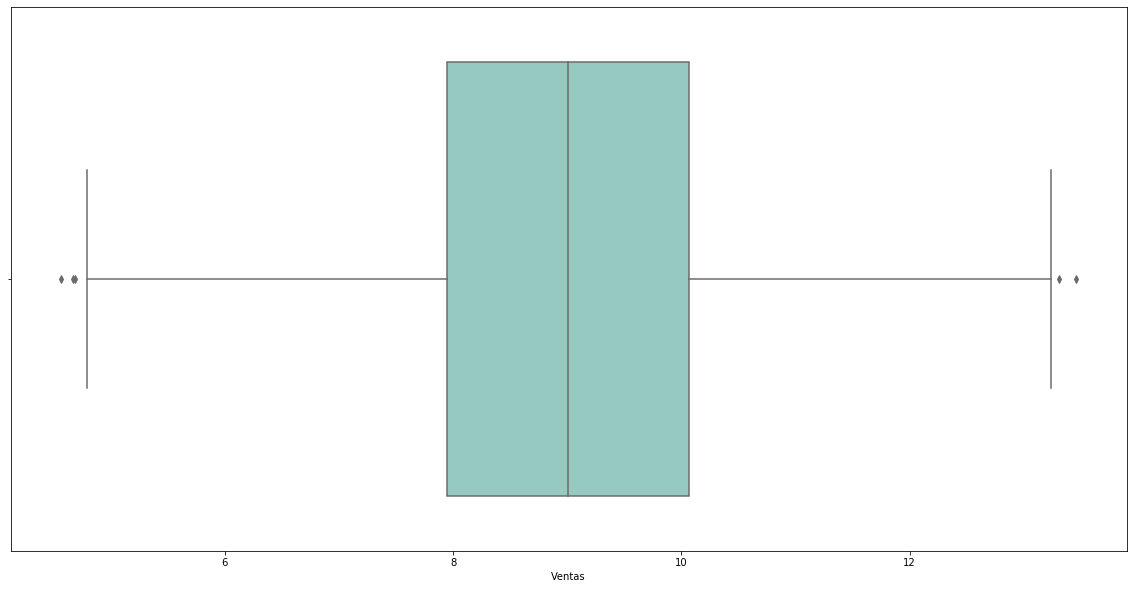

In [110]:
#Variables aisladas
plt.figure(figsize=(20,10))
sns.boxplot("Ventas", data=df_final, palette="Set3")